# Computer Vision - Exercise 8
FIRSTNAME LASTNAME

## Task 1

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

def select_points(img1, img2, scale_factor=3):
    """Function to select points from an image.
    
    First select a point from the left, then from the right. If you selected all the points you wanted, press Esc or close the window.
    """
    points1 = []
    points2 = []
    count = 0  # Use a list to make count mutable within the nested function

    def click_event(event, x, y, flags, param):
        nonlocal count
        if event == cv.EVENT_LBUTTONDOWN:
            cmod = count % 2
            if not ((cmod == 0 and x < new_width // 2) or (cmod == 1 and x >= new_width // 2)):
                return

            original_x = int((x - new_width // 2 * cmod) / scale_factor)
            original_y = int(y / scale_factor)
            if cmod == 0:
                points1.append((original_x, original_y))
            else:
                points2.append((original_x, original_y))
                startpt = (points1[-1][0] * scale_factor, points1[-1][1] * scale_factor)
                cv.line(param, startpt, (x, y), (0, 0, 255), 1)

            cv.circle(param, (x, y), 3, (0, 255, 0), -1)
            cv.imshow("Image", param)
            count += 1

    # Load image
    img = np.concatenate((img1, img2), axis=1)

    # Resize image for display
    height, width = img.shape
    new_height, new_width = int(height * scale_factor), int(width * scale_factor)
    resized_img = cv.cvtColor(cv.resize(img, (new_width, new_height), interpolation=cv.INTER_LINEAR), cv.COLOR_GRAY2BGR)

    cv.imshow("Image", resized_img)
    cv.setMouseCallback("Image", click_event, resized_img)

    # Stop when esc pressed
    while True:
        key = cv.waitKey(20) & 0xFF
        if key == 27:  # ESC key to break
            break
        if cv.getWindowProperty("Image", cv.WND_PROP_VISIBLE) < 1:  # Check if window is closed
            break
    cv.destroyAllWindows()

    plt.figure(figsize=(18, 9))
    plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
    plt.tight_layout()
    plt.axis("off")
    plt.show()
    return points1, points2


# TODO: Select points
img1 = cv.imread("books1.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("books2.jpg", cv.IMREAD_GRAYSCALE)

# Select points
points1, points2 = select_points(img1, img2)
print(points1)
print(points2)

In [ ]:
# TODO: expand and normalize points

def norm_points(points):
    
    return ...


# TODO: Build matrix A


# TODO: Compute F from A


# TODO: Compute F_dash from F. Make sure you know what np.linalg.svd returns


# TODO Denormalize and test value using ninth point

# Task 2

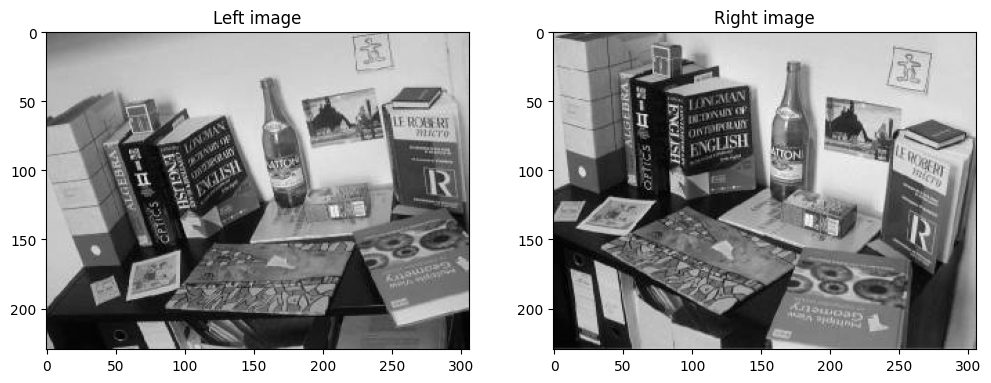

In [ ]:
# TODO Use F to find left and right epipoles


# TODO Plot the ninth point to the left image and right epipolar line to right
# Find the line coefficients from F @ el and plot the line

fig, ax = plt.subplots(1,2, figsize=(12,6))
imgl = cv.imread("books1.jpg", cv.IMREAD_GRAYSCALE)
ax[0].imshow(imgl, cmap="gray")
ax[0].set_title("Left image")

imgr = cv.imread("books2.jpg", cv.IMREAD_GRAYSCALE)
ax[1].imshow(imgr, cmap="gray")
ax[1].set_title("Right image")

plt.show()
